In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Base ResNet18 analysis

In [31]:
model_dir = 'experiments/base_resnet18'
# model_dir = 'experiments/resnet18_distill/resnext_teacher/'

keys = ['softmax_scores', 'predict_correct', 'confusion_matrix']
results = {}

for key in keys:
    filepath = os.path.join(model_dir, key + '.txt')
    value = np.loadtxt(filepath)
    results[key] = value
    

softmax_scores = results["softmax_scores"].T   #(10, 10000) dimension
predict_correct = results["predict_correct"]
confusion_matrix = results["confusion_matrix"].astype(int).T  #(predicted 0-9, truth 0-9) dimension

print(softmax_scores.shape)

(10, 10000)


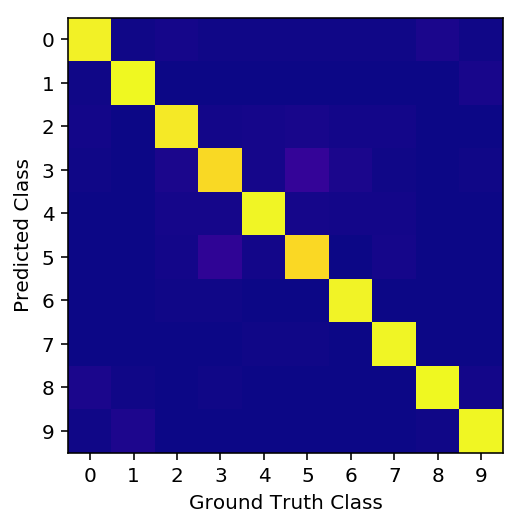

In [25]:
x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)
fig1 = plt.figure(1)
plt.imshow(confusion_matrix, cmap='plasma')
plt.xlabel('Ground Truth Class')
plt.ylabel('Predicted Class')
plt.xticks(x)
plt.yticks(y)
plt.show()

In [4]:
# Save figure 1
fig1.savefig('test.png', dpi=600)

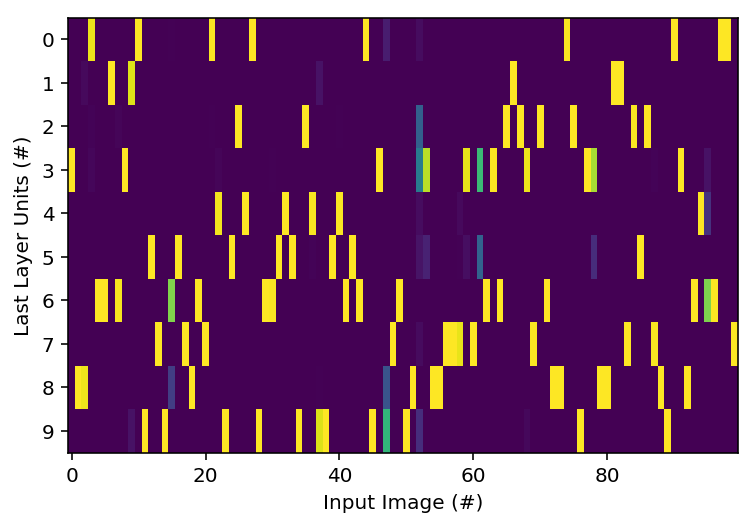

In [130]:
fig2 = plt.figure(2)

y = np.arange(0, 10, 1)

ax = plt.subplot(111)
im = plt.imshow(softmax_scores[:, :100], aspect='auto', vmin=0, vmax=1.0)
plt.xlabel('Input Image (#)')
plt.ylabel('Last Layer Units (#)')
plt.yticks(y)

plt.show()

In [126]:
#save figure 
fig2.savefig('fig2.png', dpi=600)

# Resnet18-distill w/ ResNext teacher

- Visualize original vs. softtened softmax output distributions on train set 




In [33]:

# model_dir = 'experiments/base_resnet18'
model_dir = 'experiments/resnet18_distill/resnext_teacher/'

temp_list = ['1.0', '2.0', '6.0', '20.0']
softmax_scores_temp = {}
for temp in temp_list:
    softmax_scores_temp[temp] = np.loadtxt(os.path.join(model_dir,
                                           'train_temp{}_softmax_scores.txt'.format(temp))).T

# assert softmax_scores.shape == (10, 50000)

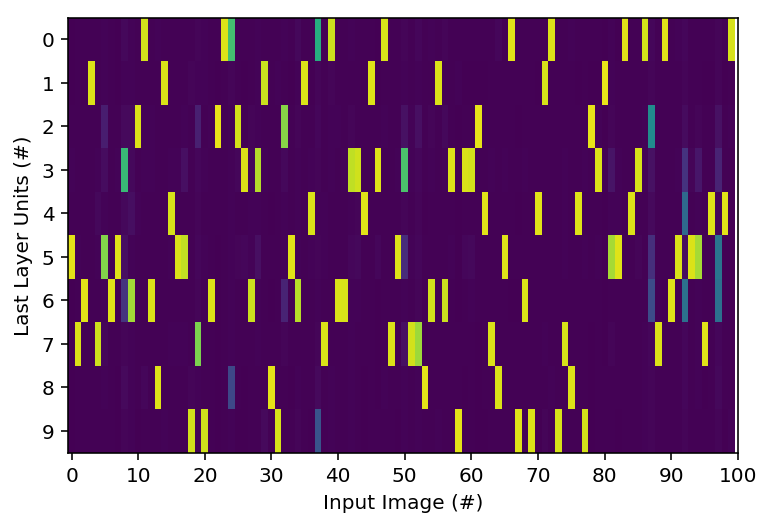

In [98]:
fig3 = plt.figure(3)

y = np.arange(0, 10, 1)
x = np.arange(0, 101, 10)

ax = plt.subplot(111)
im = plt.imshow(softmax_scores_temp["1.0"][:, :100], aspect='auto', vmin=0, vmax=1.0)
plt.xlabel('Input Image (#)')
plt.ylabel('Last Layer Units (#)')
plt.xticks(x)
plt.yticks(y)

plt.show()

In [ ]:
# save figure